# Raster Manipulation

## About the Data
We will use data from the Copernicus Digital Elevation Model (DEM). This dataset ris based on radar satellite data measuring the relative height of Earth’s surface. The Copernicus DEM is available at 30-meter and 90-meter resolution. The data prepared for this class is a tile of 1°x1° latitude/longitude form the Copernicus DEM at 90-meter resolution over the Grand Canyon in the US. Each pixel represents vertical units measured in meters.

In [3]:
#Import Libraries
import os
import numpy as np

import xarray as xr
import rioxarray as rioxr

# Exercise
- Use os to createa file path to the ‘grand_canyon_DEM.tif’ file and import the raster into a variable called gc.
- Plot the raster, check the CRS, and create a histogram with updated bin numbers.

In [5]:
gc = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data','grand_canyon_DEM.tif'))
gc

<xarray.DataArray (band: 1, y: 1200, x: 1200)>
[1440000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

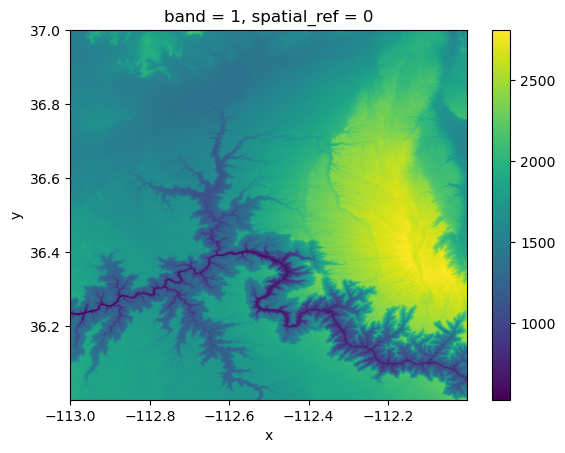

In [6]:
gc.plot()

(array([  368.,  1002.,  1763.,  2381.,  3159.,  3607.,  3764.,  4101.,
         5526.,  8326.,  9853.,  9862., 11583., 15865., 22141., 31803.,
        29119., 25586., 32636., 50592., 59436., 76685., 89187., 73194.,
        61086., 65553., 97401., 81974., 76432., 60715., 44639., 37562.,
        29224., 25343., 24134., 18892., 16106., 16701., 16172., 18105.,
        17835., 18320., 20887., 21894., 23619., 20837., 19375., 17494.,
        12246.,  5915.]),
 array([ 528.     ,  573.616  ,  619.232  ,  664.848  ,  710.46405,
         756.0801 ,  801.69604,  847.3121 ,  892.9281 ,  938.54407,
         984.1601 , 1029.7761 , 1075.3921 , 1121.0082 , 1166.6241 ,
        1212.2401 , 1257.8562 , 1303.4722 , 1349.0881 , 1394.7042 ,
        1440.3202 , 1485.9363 , 1531.5522 , 1577.1682 , 1622.7843 ,
        1668.4003 , 1714.0162 , 1759.6323 , 1805.2483 , 1850.8643 ,
        1896.4803 , 1942.0963 , 1987.7124 , 2033.3284 , 2078.9443 ,
        2124.5603 , 2170.1763 , 2215.7925 , 2261.4084 , 2307.0244 

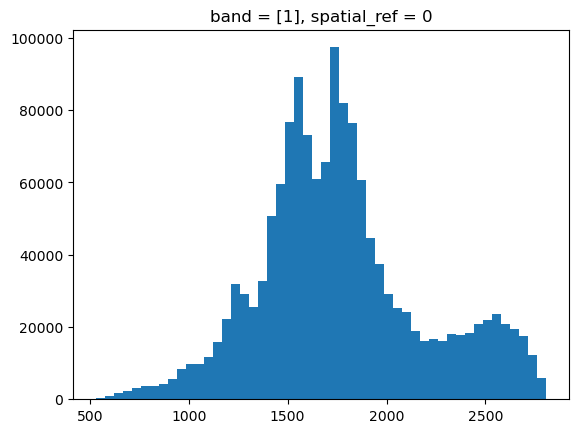

In [8]:
gc.plot.hist(bins = 50)

# Dropping a dimension
Notice that our raster has an unnecessary extra dimension: band.

This is making this datsets three-dimensional when it is not needed. We can clean this `xarray.DataArray` a bit by:

- using the `squeeze()` method. If we don’t pass any parameters, then squeeze() gets rid of all dimensions with length one, and then
- getting rid of the associated coordinates for this dimension. We can do this using the `xarray.DataArray drop()` method and specifying the name of the coordinates we want to remove, in this case ‘band’.


In [9]:
# original dimensions and coordinates
print(gc.dims, gc.coords,'\n')

# remove length 1 dimension (band)
gc = gc.squeeze()
print(gc.dims, gc.coords,'\n')

# remove coordinates associated to band
gc = gc.drop('band')
print(gc.dims, gc.coords)

#we can get rid of the band because the only band is elevation and this is making this data unnnecesarrily 3 dimensional

('band', 'y', 'x') Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0 

('y', 'x') Coordinates:
    band         int64 1
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0 

('y', 'x') Coordinates:
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0


# Global information
To get a better sense of our raster data we can apply common numpy functions to extract information from the xarray.DataArray underlying np.array.

For example, we can get the maximum across all the xarray.DataArray’s values by using the max() method:
```
# get the maximum elevation value (get an xarray.DataArray)
gc.max()
```
Notice that the output for this method is another xarray.DataArray. This is far more complicated than what we really need which is just the value. In general, methods that reduce or subset an xarray.DataArray will always return another xarray.DataArray. To extract just the value from a 1x1 xarray.DataArray as a number we use the .item() method:
```
# get the maximum elevation value as a number
gc.max().item()
```

# f-strings
So far we have printed variables using string concatenation inside the print() function. This means that we write commas between every string and variable we want to print, and then the print function concatenates these into a single string. For example:

In [10]:
# minimum elevation
# print via concatenation
print("Minimum elevation: ", gc.min().item())

Minimum elevation:  528.0


Another popular way of mixing strings and variables in print statements is by creating an f-string which stands for “formatted string”. The simplest syntax for an f-string is:
```
f" some text {replace}"
```
where replace can be a variable, an expression, or a function or method call. For example:

In [12]:
# f-string with mean elevation
f"Mean elevation: {gc.mean().item()}"

'Mean elevation: 1764.859375'

We just created a string replacing the value inside the curly brackets {}. Notice the computation is occurring in real time as the string gets made and there’s no need to define any extra variables.

One of the advantages of using f-strings is that they offer customization for formatting the output, without the need to use extra functions. For example, if we want to print the median value of our raster rounded to two decimals we can do:

In [13]:
# median elevation, rounded to two decimals
# print via f-string formatting
print(f"Median elevation: {gc.median().item():.2f}")

Median elevation: 1726.15


# Aggregation
Let’s go back to our raster. Rasters with high spatial resolution can offer great insight into fine-scale patterns, but can also be challenging to process due to their size. In these cases, it can be useful to use an aggregation method to spatially downsample and obtain a raster with a coarser resolution.

To spatially downsample an `xarray.DataArray` we use the `coarsen()` method followed by an aggreagator function. The general syntax to coarsen a 2-dimensional :
```
xdataarray.coarsen(x=x_winside, y=y_winside).aggr()
```

where:
- xdataarray is a 2-dimensional xarray.DataArray with dimensions x and y.
- x and y are the names dimensions of the xarray.DataArray (these could have other names like lon/lat)
- x_winside and y_winside are the dimensions of the window used to make the aggregation.
- aggr() is an aggregator function, this is the function which will be applied to each window. Examples are min(), max(), sum() and mean().

In [15]:
# coarsen to a 60x60 raster calculating the mean in each window
gc_coarse = gc.coarsen(x=20,y=20).mean()
gc_coarse

<xarray.DataArray (y: 60, x: 60)>
array([[1517.0162, 1521.1807, 1614.4452, ..., 1602.1825, 1632.0491,
        1647.5757],
       [1500.3119, 1524.7173, 1622.7725, ..., 1643.7584, 1640.7683,
        1764.919 ],
       [1489.5236, 1512.9801, 1547.7728, ..., 1641.8906, 1645.771 ,
        1789.8911],
       ...,
       [1914.765 , 1878.8464, 1802.3844, ..., 1501.9019, 1236.4778,
        1229.7344],
       [1917.3566, 1879.9749, 1859.9656, ..., 1414.1925, 1329.0782,
        1388.1653],
       [1919.9823, 1890.4172, 1868.7794, ..., 2007.9066, 1726.9645,
        1778.2673]], dtype=float32)
Coordinates:
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 36.99 36.98 36.96 36.94 ... 36.06 36.04 36.03 36.01
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

old resolution: 1200x1200
coarse resolution: 60x60


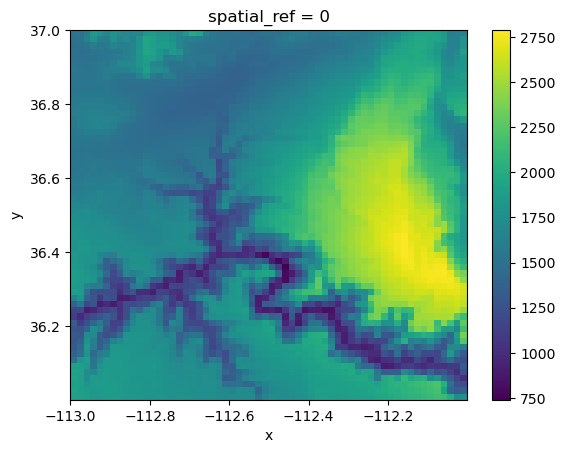

In [16]:
# inspect old and coarsened resolution
print(f"old resolution: {gc.rio.width}x{gc.rio.height}")
print(f"coarse resolution: {gc_coarse.rio.width}x{gc_coarse.rio.height}")
gc_coarse.plot()

## Exercise
1. Downsample the elevation raster into a 240x240 raster by taking the average over windows of the appropriate size.
2. Use f strings to check whether the bounds of the raster have changed

In [21]:
#downsample the raster


(-113.00041666666667, 36.000416666666666, -112.00041666666667, 37.000416666666666)


In [22]:
ex_1 = gc_coarse = gc.coarsen(x=5,y=5).mean()

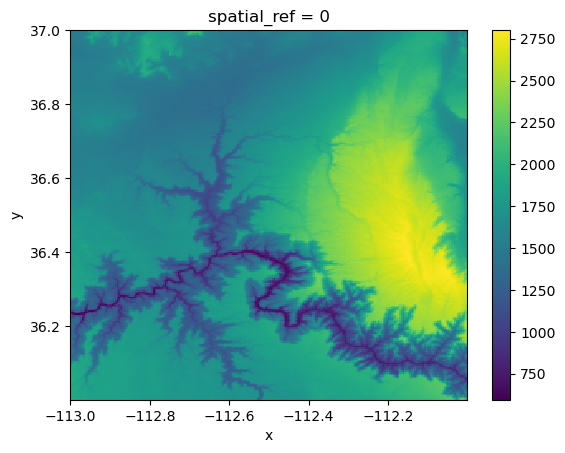

In [23]:
ex_1.plot()

In [28]:
f"Original Bounds: {np.round(gc.rio.bounds(), 4)}"

'Original Bounds: [-113.0004   36.0004 -112.0004   37.0004]'

In [27]:
f"New Bounds: {np.round(ex_1.rio.bounds(), 4)}"

'New Bounds: [-112.9988   36.0021 -112.0021   36.9988]'